# K-Means Clustering

## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym

## Importing the dataset

In [77]:
dataset = pd.read_csv('Mall_Customers.csv')
print(dataset)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [209]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3,4]].values # annual income / spending score
X_2 = dataset.iloc[:, [1,2]].values # gender / age
print(X_2[0],)

['Male' 19]


In [253]:
# Encode cagagorical data of X_2
# this code generates 3 columns, one for each col in the country var. This is to prevent the country col from effecting the computation
X_2 = dataset.iloc[:, [1,2]].values # gender / age
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(), [0])], remainder='passthrough')# object of the column transformer class
X_2 = np.array(ct.fit_transform(X_2))

## Using the elbow method to calculate the optimal number of clusters

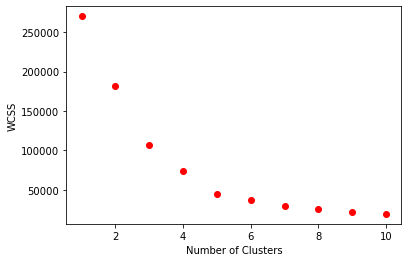

In [216]:
# Annual Income / Spending Score
#  wcss / width and cluster sum of squares

from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss, 'ro')

# plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
    
    

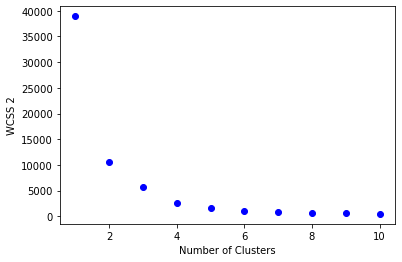

In [215]:
# Gender / Age
#  wcss / width and cluster sum of squares

wcss_2 = []
for i in range(1,11):
    kmeans_2 = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_2.fit(X_2)
    wcss_2.append(kmeans_2.inertia_)
    
plt.plot(range(1,11), wcss_2, 'bo')

# plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS 2')
plt.show()

In [214]:
# print(X_2)

## Training the K-Means model on the dataset

In [84]:
# annual income / spending score
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [217]:
# gender / age
kmeans_2 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_2 = kmeans_2.fit(X_2)

## Visualising the clusters

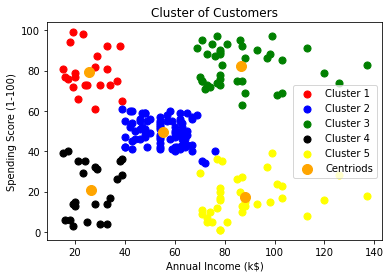

In [123]:
# annual income / spending score
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1], s=50, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1], s=50, c='black', label='Cluster 4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1], s=50, c='yellow', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],s=100,c='orange',label='Centriods')

plt.title('Cluster of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

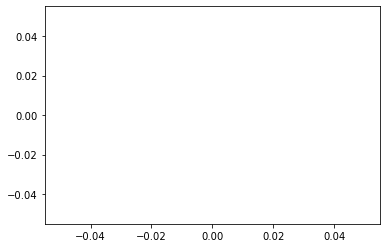

In [221]:
# gender / age
plt.scatter(X_2[y_kmeans_2 == 0,0],X_2[y_kmeans_2 == 0,1], s=50, c='red', label='Cluster 1')
plt.scatter(X_2[y_kmeans_2 == 1,0],X_2[y_kmeans_2 == 1,1], s=50, c='blue', label='Cluster 2')
# plt.scatter(X[y_kmeans_2 == 2,0],X[y_kmeans_2 == 2,1], s=50, c='green', label='Cluster 3')
# plt.scatter(X[y_kmeans_2 == 3,0],X[y_kmeans_2 == 3,1], s=50, c='black', label='Cluster 4')
# plt.scatter(kmeans_2.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],s=100,c='orange',label='Centriods')

# plt.title('Cluster of Customers')
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
# plt.legend()
plt.show()

In [224]:
X_2

array([[0.0, 1.0, 19],
       [0.0, 1.0, 21],
       [1.0, 0.0, 20],
       [1.0, 0.0, 23],
       [1.0, 0.0, 31],
       [1.0, 0.0, 22],
       [1.0, 0.0, 35],
       [1.0, 0.0, 23],
       [0.0, 1.0, 64],
       [1.0, 0.0, 30],
       [0.0, 1.0, 67],
       [1.0, 0.0, 35],
       [1.0, 0.0, 58],
       [1.0, 0.0, 24],
       [0.0, 1.0, 37],
       [0.0, 1.0, 22],
       [1.0, 0.0, 35],
       [0.0, 1.0, 20],
       [0.0, 1.0, 52],
       [1.0, 0.0, 35],
       [0.0, 1.0, 35],
       [0.0, 1.0, 25],
       [1.0, 0.0, 46],
       [0.0, 1.0, 31],
       [1.0, 0.0, 54],
       [0.0, 1.0, 29],
       [1.0, 0.0, 45],
       [0.0, 1.0, 35],
       [1.0, 0.0, 40],
       [1.0, 0.0, 23],
       [0.0, 1.0, 60],
       [1.0, 0.0, 21],
       [0.0, 1.0, 53],
       [0.0, 1.0, 18],
       [1.0, 0.0, 49],
       [1.0, 0.0, 21],
       [1.0, 0.0, 42],
       [1.0, 0.0, 30],
       [1.0, 0.0, 36],
       [1.0, 0.0, 20],
       [1.0, 0.0, 65],
       [0.0, 1.0, 24],
       [0.0, 1.0, 48],
       [1.0

In [189]:
# experimental
ages_genders = []
for i in range(len(X_2)):
    if X_2[i][-1] > 50 and X_2[i][-2] > 50 :
        age_gen = [X_2[i][1],X_2[i][2]] # age and gender
        ages_genders.append(age_gen)

print(ages_genders)

[['Male', 26], ['Female', 45], ['Female', 23], ['Male', 57], ['Male', 38], ['Female', 21], ['Female', 55], ['Female', 22], ['Female', 34], ['Female', 68], ['Male', 24], ['Male', 67], ['Male', 26], ['Male', 49], ['Male', 65], ['Female', 19], ['Female', 49], ['Female', 50], ['Male', 27], ['Female', 40], ['Male', 39], ['Female', 31], ['Male', 40], ['Male', 38], ['Male', 39], ['Female', 31], ['Female', 29], ['Male', 32], ['Female', 35], ['Male', 32], ['Female', 32], ['Male', 28], ['Female', 32], ['Male', 34], ['Male', 39], ['Female', 38], ['Female', 27], ['Female', 30], ['Female', 30], ['Female', 29], ['Female', 31], ['Female', 36], ['Female', 33], ['Male', 32], ['Male', 28], ['Male', 36], ['Female', 30], ['Male', 27], ['Male', 35], ['Female', 32], ['Female', 29], ['Male', 30], ['Male', 28], ['Female', 36], ['Female', 32], ['Female', 38], ['Female', 35], ['Male', 32], ['Male', 30]]


In [196]:
# experimental
males = 0
females = 0

for i in range(len(ages_genders)):
    if ages_genders[i][0] == 'Male' :
        males += 1
    else :
        females += 1
print(males, 'males', females, 'females')

27 males 32 females


In [200]:
# experimental

ave = 0
for i in ages_genders:
    ave += i[1]
print(ave/len(ages_genders))  

35.25423728813559


In [207]:
print(len(X_2))

200
